# Physics 256
## Lecture 09 - More Numpy and Matplotlib

<img src="http://matplotlib.org/_static/logo2.png" width=400px>

## Last Time

- reading and writing numerical data to files
- an introduction to numpy arrays

## Today
- multidimensional arrays with numpy
- introduction to plotting with matplotlib


## NumPy

Recall: NumPy is the fundamental package needed for scientific computing with Python. It contains among other things:
- a powerful N-dimensional array object 
- sophisticated and optimized array (broadcasting) functions
- tools for integrating C/C++ and Fortran code 
- useful linear algebra, Fourier transform, and random number capabilities

We can import all this functionality using the `import` command.  It is customary to use the shortform `np`

<div class="span alert alert-success">
<h2> Team Programming Challenge </h2>
<ol>
<li>Find indices of non-zero elements from [1,2,0,0,4,0].</li>
<li>Create an array of uniformly distributed random numbers between 1 and 3 and explore how the average depends on the length of the array.
<li> Show that a 10x10 identity matrix is idempotent. </li>
<li> Explore the meshgrid method and use it to evaluate the matrix $Z = X^2 + Y^2
$ on a 10x10 grid between -1,1.
</ol>
</div>

In [1]:
import numpy as np

In [3]:
a = np.array([1,2,0,0,4,0],dtype=int)
np.nonzero(a)

(array([0, 1, 4]),)

In [4]:
for i in range(1,6):
    N = 10**i
    r = 1.0 + 2*np.random.random(N)
    print('%12s\t%f'%(N,np.average(r)))

          10	2.076475
         100	1.985897
        1000	1.983591
       10000	1.995819
      100000	1.999824


<div class="span alert alert-info">
<h2> Individual Programming Challenge</h2>
<h3> Create the following 5x5 matrix programatically. </h3>
</div>
</div>

<table>
  <tr>
    <td >0</td>
    <td>1</td>
    <td >2</td>
    <td >3</td>
    <td >4</td>
  </tr>
  <tr>
    <td class="tg-s6z2">10</td>
    <td class="tg-031e">11</td>
    <td class="tg-031e">12</td>
    <td class="tg-031e">13</td>
    <td class="tg-031e">14</td>
  </tr>
  <tr>
    <td class="tg-s6z2">20</td>
    <td class="tg-031e">21</td>
    <td class="tg-031e">22</td>
    <td class="tg-031e">23</td>
    <td class="tg-031e">24</td>
  </tr>
  <tr>
    <td class="tg-s6z2">30</td>
    <td class="tg-031e">31</td>
    <td class="tg-031e">32</td>
    <td class="tg-031e">33</td>
    <td class="tg-031e">34</td>
  </tr>
  <tr>
    <td class="tg-s6z2">40</td>
    <td class="tg-031e">41</td>
    <td class="tg-031e">42</td>
    <td class="tg-031e">43</td>
    <td class="tg-031e">44</td>
  </tr>
</table>

<!--M = np.array([[10*j+i for i in range(5)] for j in range(5)])
print M
-->

In [5]:
M = np.array([[j +i for i in range(5)] for j in range(0,41,10)])
print(M)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


### Matrix slicing

In [6]:
M[0,2:4]

array([2, 3])

In [7]:
M[1:3,1:3]

array([[11, 12],
       [21, 22]])

In [8]:
M[:,2]

array([ 2, 12, 22, 32, 42])

In [9]:
M[2::2,::3]

array([[20, 23],
       [40, 43]])

<div class="span alert alert-danger">
Slices are references to memory in the original array.  If any slice changs, the data in the array will change.
</div>


In [10]:
M[2::2,::3] = -1000
M

array([[    0,     1,     2,     3,     4],
       [   10,    11,    12,    13,    14],
       [-1000,    21,    22, -1000,    24],
       [   30,    31,    32,    33,    34],
       [-1000,    41,    42, -1000,    44]])

We need to use copies to avoid this problem

In [11]:
M2 = np.copy(M)
M2

array([[    0,     1,     2,     3,     4],
       [   10,    11,    12,    13,    14],
       [-1000,    21,    22, -1000,    24],
       [   30,    31,    32,    33,    34],
       [-1000,    41,    42, -1000,    44]])

In [12]:
M2[2::2,::3] = 1000
M2

array([[   0,    1,    2,    3,    4],
       [  10,   11,   12,   13,   14],
       [1000,   21,   22, 1000,   24],
       [  30,   31,   32,   33,   34],
       [1000,   41,   42, 1000,   44]])

In [13]:
M

array([[    0,     1,     2,     3,     4],
       [   10,    11,    12,    13,    14],
       [-1000,    21,    22, -1000,    24],
       [   30,    31,    32,    33,    34],
       [-1000,    41,    42, -1000,    44]])

### Reading/Writing arrays to/from disk

We already saw np.genfromtxt().  We can also use np.loadtxt() and np.savetxt() to drastically simplify numerical file input/output.

In [14]:
# loadtxt ignores comments with '#' by default
data = np.loadtxt('data/sho_energy.dat')

# create a new array that also includes the total energy
energies = np.zeros([data.shape[0],data.shape[1]+1])
energies[:,:2] = data
energies[:,-1] = data[:,0] + data[:,1]

# create the header string
cols = ('Kinetic [K]','Potential [K]','Total Energy [K]')
headers = '%14s\t%16s\t%16s' % cols

# save to disk
np.savetxt('data/sho_energy_total.dat', energies, fmt='%+16.8E', 
           delimiter='\t', comments='# ', header=headers)

In [15]:
!cat data/sho_energy_total.dat

#    Kinetic [K]	   Potential [K]	Total Energy [K]
 +6.22407909E-01	 +3.77134851E-01	 +9.99542760E-01
 +4.29547101E-01	 +2.42379252E-01	 +6.71926353E-01
 +2.37001671E-01	 +2.67495403E-01	 +5.04497074E-01
 +3.01818649E-01	 +2.58392255E-01	 +5.60210904E-01
 +4.09565316E-01	 +3.15222495E-01	 +7.24787811E-01
 +2.14317707E-01	 +4.51218376E-01	 +6.65536083E-01
 +4.18641845E-01	 +2.89516631E-01	 +7.08158476E-01
 +3.66230261E-01	 +2.80669596E-01	 +6.46899857E-01
 +2.39985912E-01	 +3.49197015E-01	 +5.89182927E-01
 +4.08868551E-01	 +2.73554341E-01	 +6.82422892E-01
 +4.29891894E-01	 +2.28270437E-01	 +6.58162331E-01
 +1.76880098E-01	 +3.74807008E-01	 +5.51687106E-01
 +4.50146777E-01	 +2.60430892E-01	 +7.10577669E-01
 +2.94294733E-01	 +3.82058897E-01	 +6.76353630E-01
 +4.52161080E-01	 +2.44881829E-01	 +6.97042909E-01
 +3.44609451E-01	 +3.31618376E-01	 +6.76227827E-01
 +4.01977123E-01	 +2.86437236E-01	 +6.88414359E-01
 +1.95875270E-01	 +3.09855155E-01	 +5.05730425E-01
 +4.07812408E-01	 +3.67230198E-

# Matplotlib

This is an extremely flexible plotting library that can do almost everything we need from simple 1d plots, to matrices of supbplots, 3d plots and animations with full support for LaTeX.  It was created by John Hunter as a replacement for matlab, so many of the command may be familiar to you already.

<img src="http://matplotlib.org/_static/John-hunter-crop-2.jpg">

<blockquote>
Matplotlib tries to make easy things easy and hard things possible. <br />
  -- John Hunter (1968-2012)
</blockquote>

Nobody can memorize all the configuration options and plot types.  Plan to make heavy use of the example code on the matplotlib website:

http://matplotlib.org

It is conventional to import via:

In [16]:
import matplotlib.pyplot as plt

Historically (I still do this sometimes) people used `import pylab as pl` which is a convenicnce module that imports both pyplot and numpy in one package.  It is better programming form to use:

    import numpy as np
    import matplotlib.pyplot as plt

as there is no guarentee that as `numpy` continues to evolve, all its latest features will be in pylab.

If you are using the iPython notebook, you can have plots displayed inline using an iPython magic:

In [17]:
%matplotlib inline 
# or %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

If you are writing scripts or using canopy, you will need to explicitly type the `plt.show()` command to see a plot appear.

<div class="span alert alert-danger">
The default backend (GUI display) will differ depending on your OS.  Some may draw the plot to the screen without the use of the plt.show() command, but it is good practice to use it.
</div>

## Plotting Styles

Learn how to use stylesheets for consistent plot styling:
http://matplotlib.org/users/style_sheets.html

In [18]:
plt.style.use('notebook')

In [19]:
!cat /Users/agdelma/.matplotlib/stylelib/notebook.mplstyle

# A matplotlib stylesheet for use in the notebook

lines.linewidth : 3
lines.markersize : 10

legend.fontsize  : 16
legend.frameon : False

font.family : sans-serif
font.sans-serif : Helvetica

figure.figsize   : 8,5
figure.subplot.bottom: 0.15
figure.subplot.left: 0.15
figure.subplot.right: 0.95
figure.subplot.top: 0.95

axes.prop_cycle: cycler('color',['2078B5', 'FF7F0F', '2CA12C', 'D72827', '9467BE', '8C574B', 'E478C2', '808080', 'BCBE20', '17BED0', 'AEC8E9', 'FFBC79', '98E08B', 'FF9896', 'C6B1D6', 'C59D94', 'F8B7D3', 'C8C8C8', 'DCDC8E', '9EDAE6'])

# ticks
xtick.major.size : 6      # major tick size in points
xtick.major.width  : 2.0    # major tick width in points
xtick.minor.size : 0      # minor tick size in points
ytick.major.size : 6      # major tick size in points
ytick.major.width  : 2.0    # major tick width in points
ytick.minor.size : 0      # minor tick size in points

text.usetex: False

pdf.fonttype       : 42

# AXES
axes.titlesize : 24
axes.linewidth : 2.0     # edg

## Basic plotting 

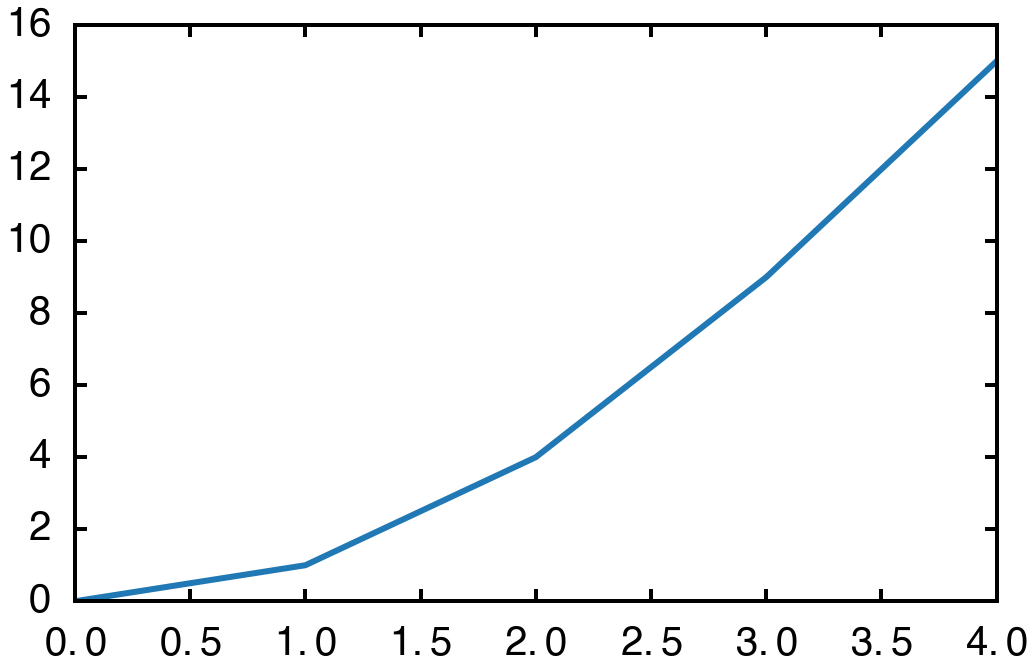

In [20]:
# Our first plot, a list
plt.plot([0,1,4,9,15])

Providing a single list to `plot()` causes the x-axis to be taken as the integer indices of the list.

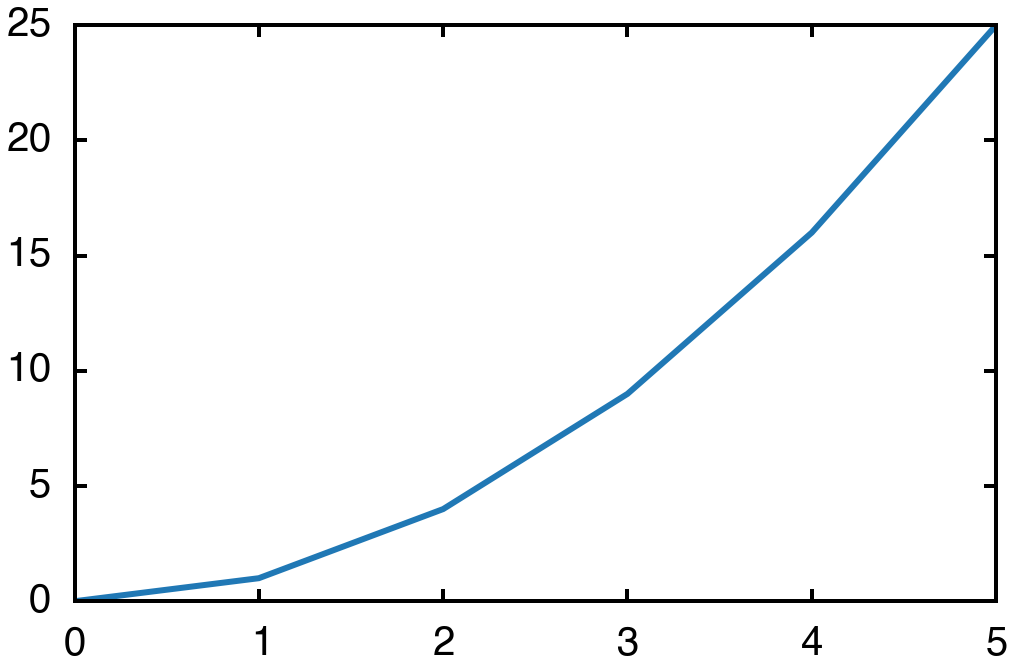

In [21]:
# can use all the python tricks we have learned so far
x = list(range(6))
plt.plot(x,[xi**2 for xi in x])

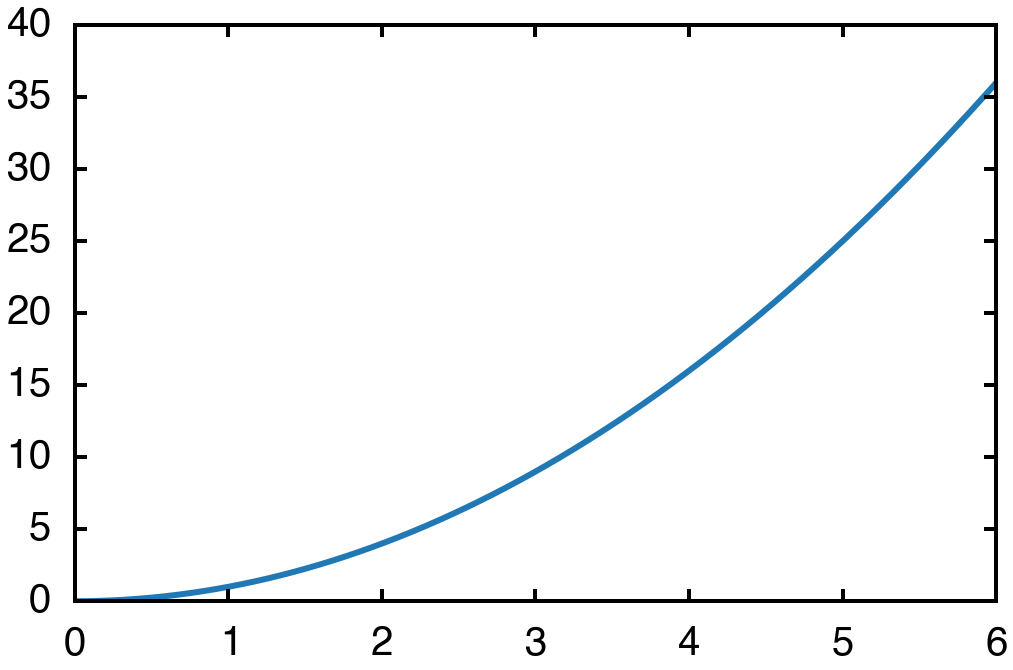

In [22]:
# We can use numpy array operations to simplify things
x = np.arange(0,6,0.001)
plt.plot(x,x**2)

## Combining data

Until we explicitly issue the `show()` command or shange the figure number with `figure(num=?)` all data will be included on the same plot

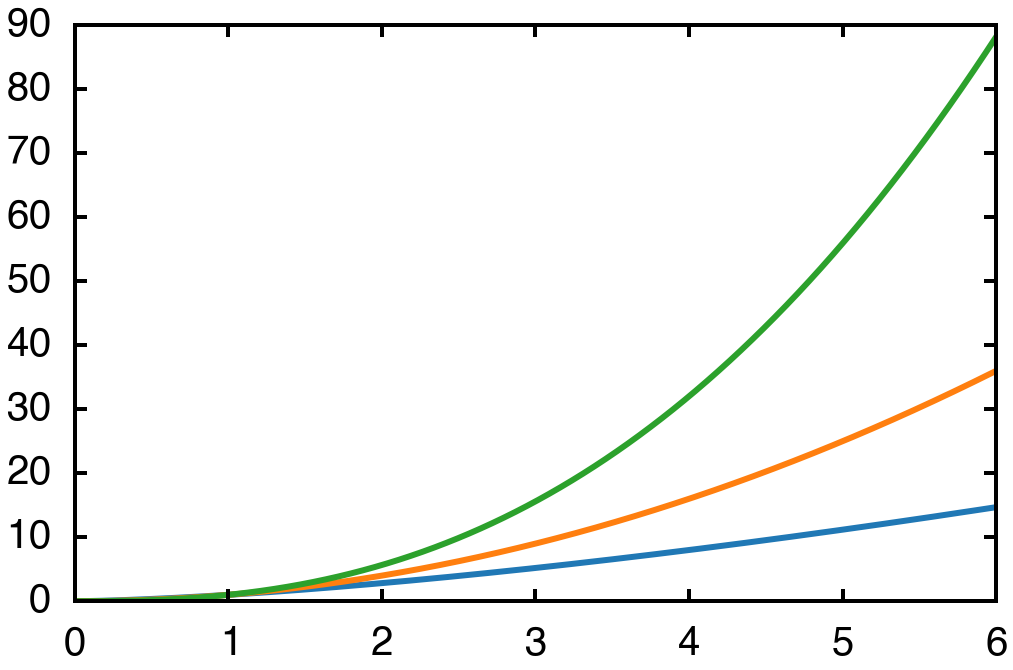

In [23]:
plt.figure(num=3)
plt.plot(x,x**1.5)
plt.plot(x,x**2)
plt.plot(x,x**2.5)

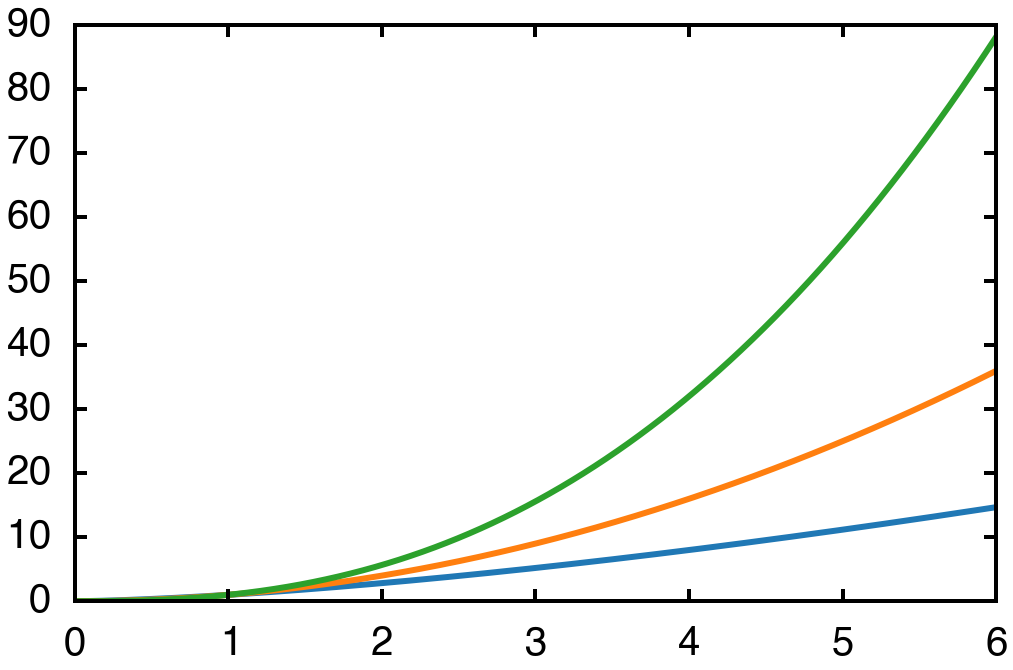

In [24]:
# we could have included them all in a single line
plt.plot(x,x**1.5,x,x**2,x,x**2.5)

## Customizing

There are multitudinous ways to customize the look of your plots

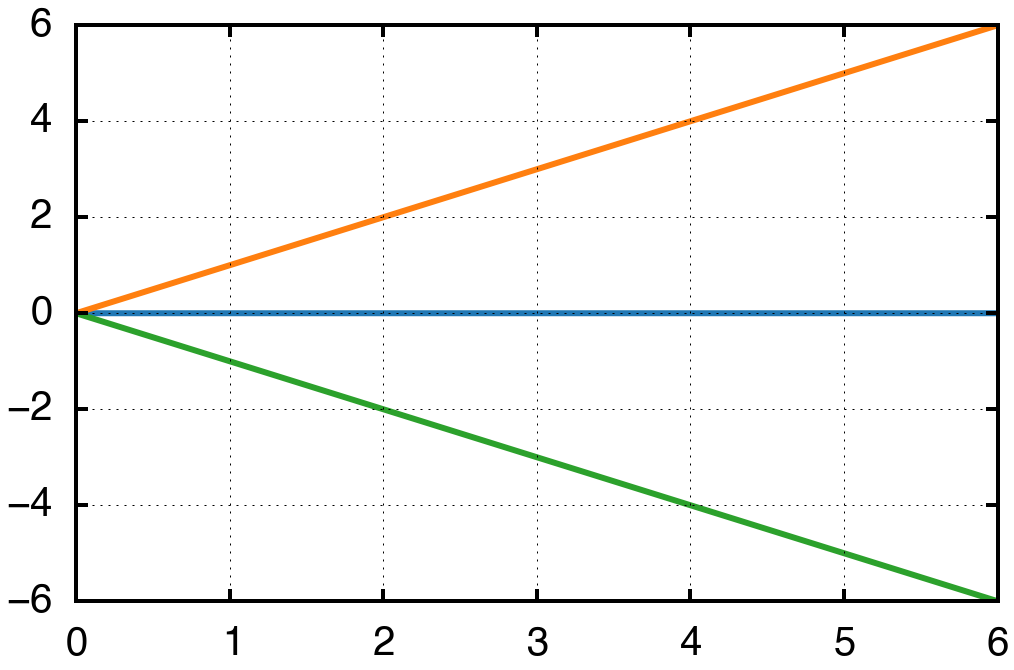

In [25]:
# grids
plt.plot(x,0*x,x,x,x,-x)
plt.grid(True)

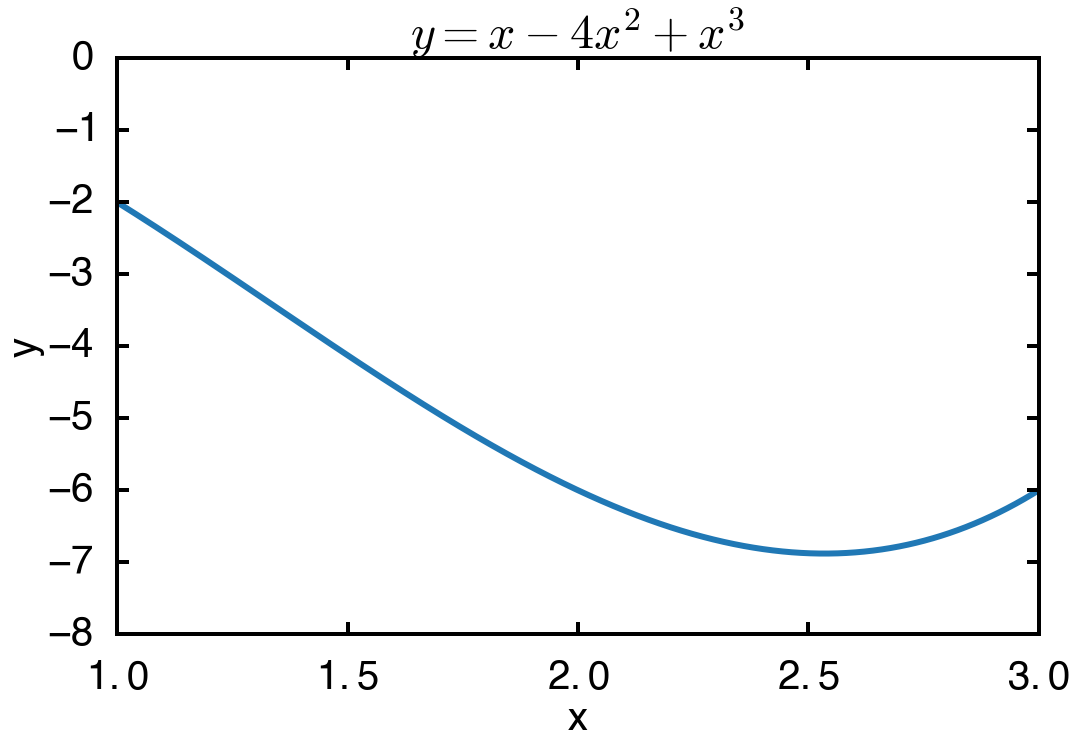

In [26]:
# specifying axes bounds, labels and titles
y = x - 4*x**2 + x**3
plt.plot(x,y)
plt.xlim(1,3)
plt.ylim(-8,0)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$y = x - 4x^2 + x^3$')

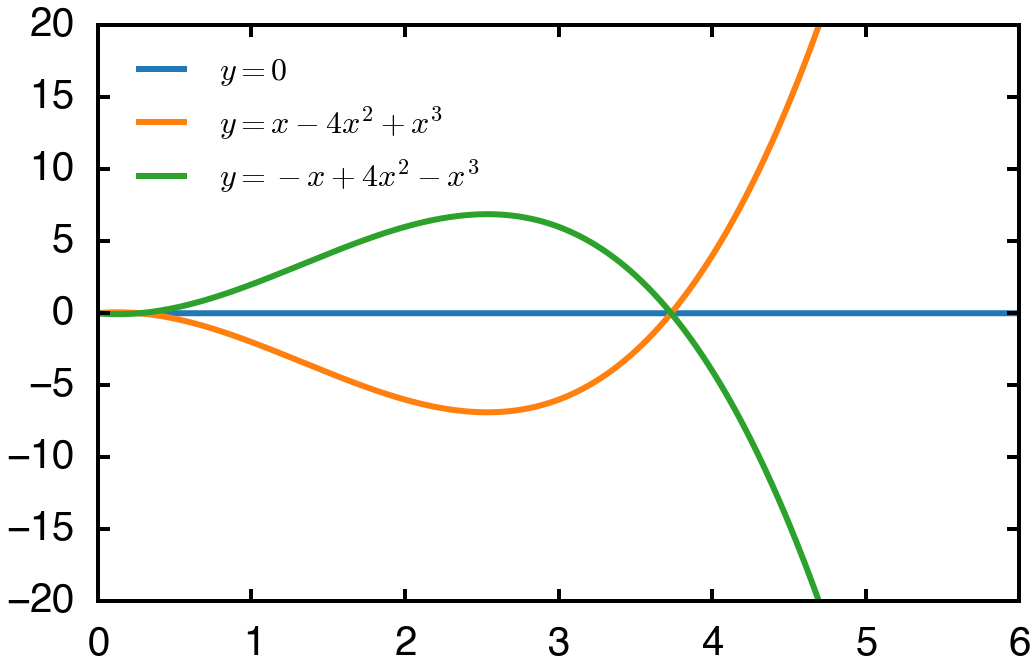

In [27]:
# adding a legend
plt.plot(x,0*x,label=r'$y=0$')
plt.plot(x,y,label=r'$y=x-4x^2+x^3$')
plt.plot(x,-y,label=r'$y=-x+4x^2-x^3$')
plt.ylim(-20,20)
plt.legend(loc='upper left', fontsize=16)

`legend` locations are: ‘best’, ‘upper right’, ‘upper left’, ‘lower left’, ‘lower right’, ‘right’, ‘center left’, ‘center right’, ‘lower center’, ‘upper center’ and ‘center’

If any label argument is set to the literal string `_nolegend_`, then that line is excluded from the legend.


<div class="span alert alert-success">
<h2> Team Programming Challenge </h2>
<h3>Observation of Gravitational Waves from a Binary Black Hole Merger</h3>

<p>
Paper: http://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102 <br />
</p>

<p>
I have extracted the processed data sets corresponding to the LIGO strain observation time series in Hanford, WA (H1) and Livingston, LA (L1) and uploaded them as ligo_data.dat.  The numerical predictions from general relativity for a binary black hole merger are included as nr_prediction.dat.
</p>
<br />
<p>
Download the data sets, load them and produce a plot comparing the obeservations to the theoretical prediction.  Make sure to label all axes and add a legend labelling your curves.  Compare with the top right hand panels of Figure 1 in the linked paper.
</p>

</div>



(-0.05, 0.05)

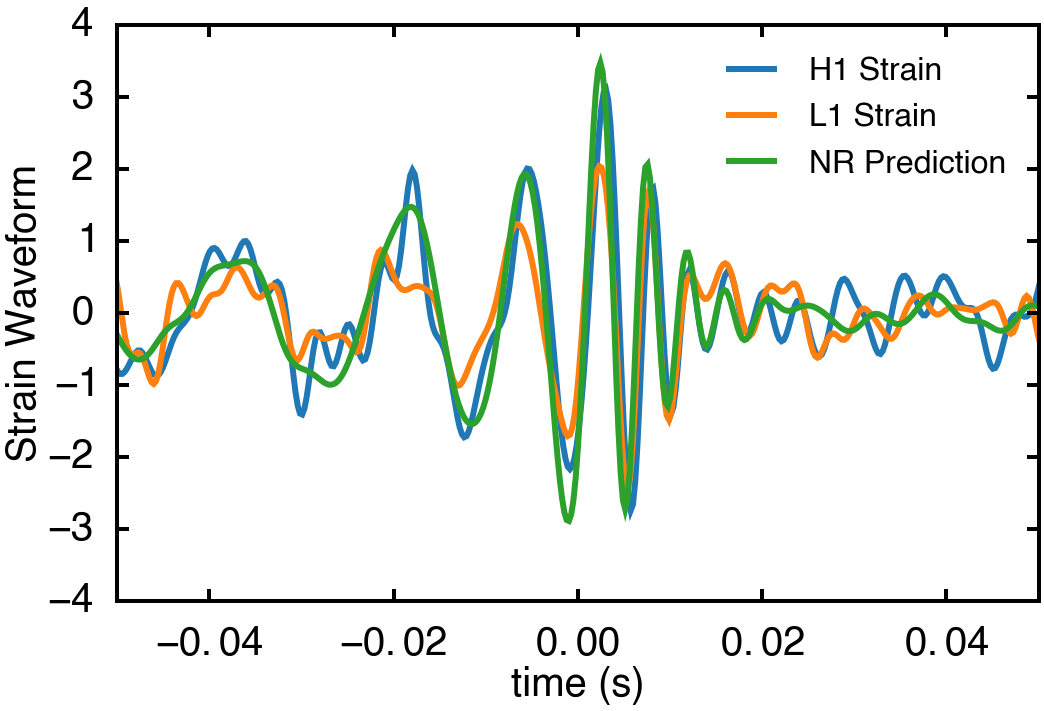

In [33]:
data = np.loadtxt('data/ligo_data.dat')
pred = np.loadtxt('data/nr_prediction.dat')
plt.plot(data[:,0],data[:,1],label='H1 Strain')
plt.plot(data[:,0],data[:,2],label='L1 Strain')
plt.plot(pred[:,0],pred[:,1],label='NR Prediction')
plt.xlabel('time (s)')
plt.ylabel('Strain Waveform')
plt.legend()
plt.ylim(-4,4);
plt.xlim(-0.05,0.05)